In [138]:
import pandas as pd
import glob
import time
import warnings
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

In [139]:
# Disable iPython low_memory warnings
warnings.filterwarnings('ignore')

In [140]:
# Read csv containing list of columns to drop
drop_col = pd.read_csv('C:\\Resources\\drop_columns.csv', index_col=False)
drop_col_list = drop_col['ColNum'].tolist()

# Read csv containing unique carrier IDs with full names
carriers = pd.read_csv('C:\\Resources\\L_UNIQUE_CARRIERS.csv', index_col=False)

In [141]:
start_time = time.time()

origin_df_list = []
dest_df_list = []
counter = 1

print('------------------------------\nBegin Data Munging\n------------------------------')

#path = "raw/*.csv"
path = 'C:\\Resources\\Flight_Delays_2016/*.csv'
for fname in glob.glob(path):
    print(f'Processing file {"{0:>2s}".format(str(counter))} of {len(glob.glob(path))} | {fname}')
    counter = counter + 1
    
    raw_data = pd.read_csv(fname, index_col=False)
    raw_df = pd.DataFrame(raw_data)
    raw_df = raw_df.drop(raw_df.iloc[:,drop_col_list], axis=1)
    
    origin_df = raw_df[raw_df['Origin'] == 'LAX']
    origin_df = origin_df.dropna(subset=['DepDel15'])
    origin_df = origin_df.join(carriers.set_index('Code')['Description'], on='UniqueCarrier')
    origin_df = origin_df.rename(columns={'Description':'CarrierName'})
    origin_df_list.append(origin_df)
    
    dest_df = raw_df[raw_df['Dest'] == 'LAX']
    dest_df = dest_df.dropna(subset=['ArrDel15'])
    dest_df = dest_df.join(carriers.set_index('Code')['Description'], on='UniqueCarrier')
    dest_df = dest_df.rename(columns={'Description':'CarrierName'})
    dest_df_list.append(dest_df)    

print('------------------------------\nSaving origin delay data...')
combined_origin = pd.concat(origin_df_list)
combined_origin = combined_origin.reset_index(drop=True)
combined_origin.to_csv('C:\\Resources\\LAX_Origin_Flight_Delays_2016.csv', encoding='utf-8', index=False)

print('Saving destination delay data...')
combined_dest = pd.concat(dest_df_list)
combined_dest = combined_dest.reset_index(drop=True)
combined_dest.to_csv('C:\\Resources\\LAX_Dest_Flight_Delays_2016.csv', encoding='utf-8', index=False)

print('------------------------------\nData Munging Complete')
print('Processing time: '+ str(round(time.time() - start_time, 2)) + ' seconds')
print('------------------------------')

------------------------------
Begin Data Munging
------------------------------
Processing file  1 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_1.csv
Processing file  2 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_10.csv
Processing file  3 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_11.csv
Processing file  4 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_12.csv
Processing file  5 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_2.csv
Processing file  6 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_3.csv
Processing file  7 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_4.csv
Processing file  8 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_5.csv
Processing file  9 of 12 | C:\Resources\Flight_Delays_2016\On_Time_On_Time_Performance_2016_6.csv
Processing file 10 of 12 | C:\Reso

In [142]:
#create origin df
origin_delays_path = os.path.join("C:/", "Resources", "LAX_Origin_Flight_Delays_2016.csv")
origin_delays_df = pd.read_csv(origin_delays_path)

In [143]:
#find total # of flights with an ARRIVAL delay for DAY OF WEEK

TC_count_origin_dow = origin_delays_df.groupby(["CarrierName","DayOfWeek"])["ArrDelayMinutes"].count()

In [144]:
#find total # of flights with ARRIVAL delays > the "average" delay for DAY OF WEEK

higherthannormalcount_origin_dow = origin_delays_df.groupby(["CarrierName","DayOfWeek"])["ArrDelayMinutes"].apply(lambda val: (val > 13.91).sum())

In [145]:
#calculate the percentage of ARRIVAL flights experiencing a greater than average delay for DAY OF WEEK
origin_df_dow = round(higherthannormalcount_origin_dow / TC_count_origin_dow * 100,2)

In [146]:
#create pivot of dataFrame for visualization purposes
higherthannormaldoworigin = origin_df_dow.reset_index().pivot(index='DayOfWeek', columns='CarrierName', values='ArrDelayMinutes').fillna(0)


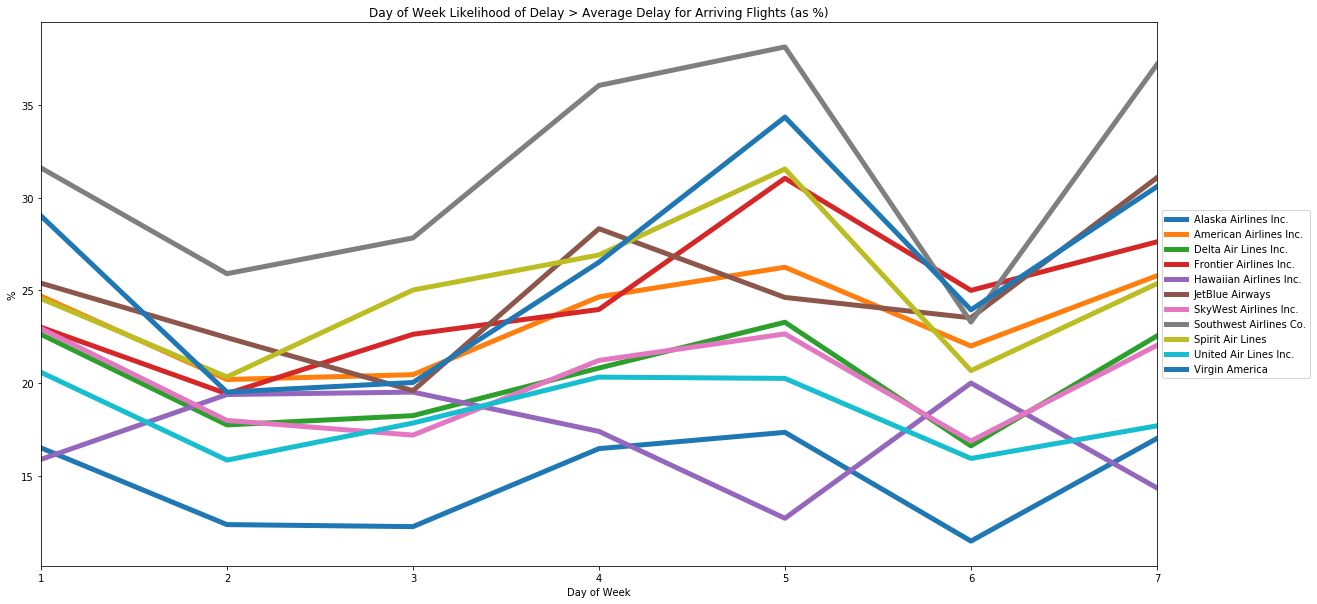

In [147]:
#For ARRIVAL flights, on each day of the week, what is the liklihood you'll experience a greater than average delay (i.e. greater than 13.91 minutes), by carrier

higherthannormaldoworigin.plot(kind="line", linewidth=5, figsize=(20,10), title="Day of Week Likelihood of Delay > Average Delay for Arriving Flights (as %)")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Day of Week")
ax.set_ylabel("%")
plt.savefig("DOW_Origin_GreaterDelayvsAvg.png")
plt.show()

In [148]:
#find total # of flights with an ARRIVAL delay for DAY OF MONTH

TC_count_origin_dom = origin_delays_df.groupby(["CarrierName","DayofMonth"])["ArrDelayMinutes"].count()

In [149]:
#find total # of flights with ARRIVAL delays > the "average" delay for DAY OF MONTH (i.e. greater than 13.91 minutes), by carrier


higherthannormalcount_origin_dom = origin_delays_df.groupby(["CarrierName","DayofMonth"])["ArrDelayMinutes"].apply(lambda val: (val > 13.91).sum())

In [150]:
#calculate the percentage of ARRIVAL flights experiencing a greater than average delay for day of month
origin_df_dom = round(higherthannormalcount_origin_dom / TC_count_origin_dom * 100,2)

In [151]:
#create pivot of dataFrame for visualization purposes
higherthannormaldomorigin = origin_df_dom.reset_index().pivot(index='DayofMonth', columns='CarrierName', values='ArrDelayMinutes').fillna(0)


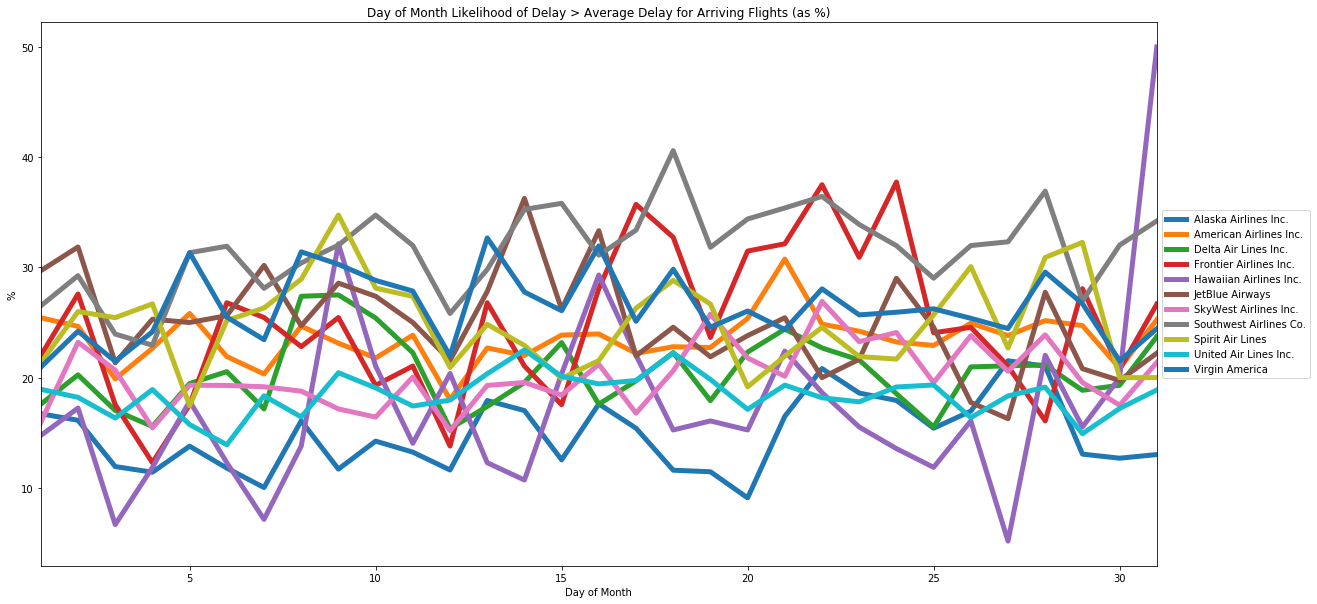

In [152]:
#For ORIGIN flights, on each day of the month, what is the liklihood you'll experience a greater than average delay (i.e. greater than 13.91 minutes), by carrier

higherthannormaldomorigin.plot(kind="line", linewidth=5, figsize=(20,10), title="Day of Month Likelihood of Delay > Average Delay for Arriving Flights (as %)")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Day of Month")
ax.set_ylabel("%")
plt.savefig("DOM_Origin_GreaterDelayvsAvg.png")
plt.show()

In [153]:
#create destination df
dest_delays_path = os.path.join("C:/", "Resources", "LAX_Dest_Flight_Delays_2016.csv")
dest_delays_df = pd.read_csv(dest_delays_path)

In [154]:
#find total # of flights DEPARTING per DAY OF WEEK

TC_count_dest_dow = dest_delays_df.groupby(["CarrierName","DayOfWeek"])["DepDelayMinutes"].count()

In [155]:
#find total # of flights with DESTINATION delays > the "average" delay for DAY OF WEEK

higherthannormalcount_dest_dow = dest_delays_df.groupby(["CarrierName","DayOfWeek"])["DepDelayMinutes"].apply(lambda val: (val > 12.52).sum())

In [156]:
#calculate the percentage of departing flights experiencing a greater than average delay for day of week
dest_df_dow = round(higherthannormalcount_dest_dow / TC_count_dest_dow * 100,2)

In [157]:
#create pivot of dataFrame for visualization purposes
higherthannormaldowdest = dest_df_dow.reset_index().pivot(index='DayOfWeek', columns='CarrierName', values='DepDelayMinutes').fillna(0)


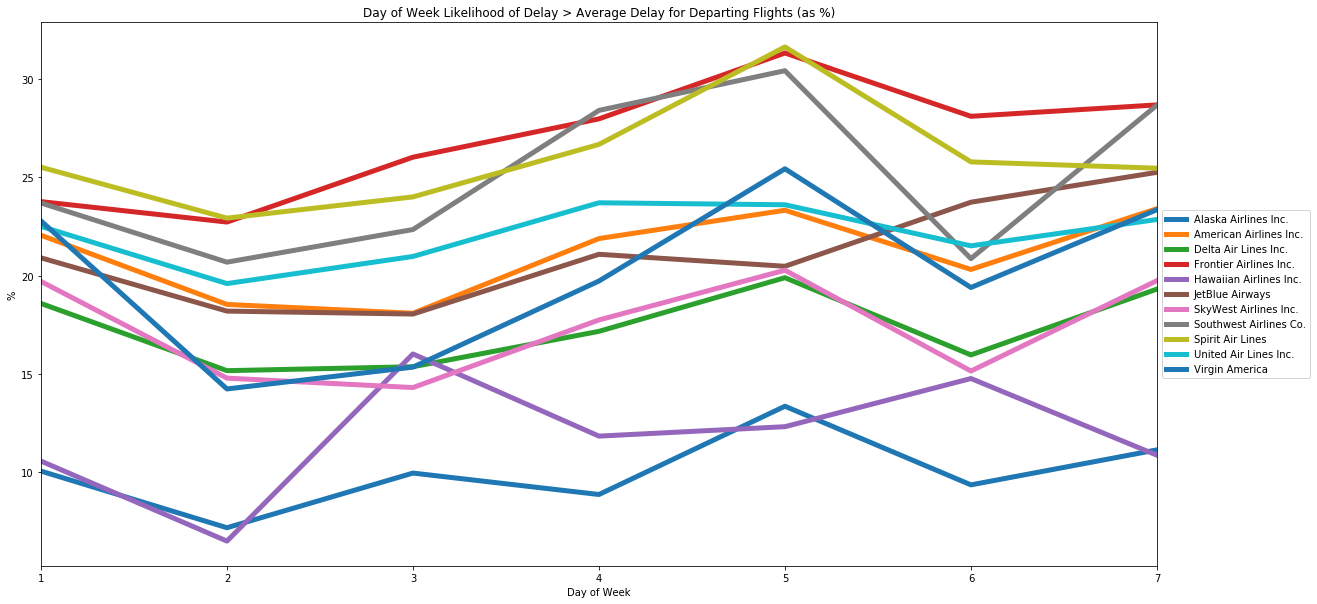

In [158]:
#For DESTINATION flights, on each day of the week, what is the liklihood you'll experience a greater than average delay (i.e. greater than 12.52 minutes), by carrier

higherthannormaldowdest.plot(kind="line", linewidth=5, figsize=(20,10), title="Day of Week Likelihood of Delay > Average Delay for Departing Flights (as %)")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Day of Week")
ax.set_ylabel("%")
plt.savefig("avgorigindelay.png")
plt.savefig("DOW_Dest_GreaterDelayvsAvg.png")
plt.show()

In [159]:
#find total # of flights DEPARTING per DAY OF MONTH

TC_count_dest_dom = dest_delays_df.groupby(["CarrierName","DayofMonth"])["DepDelayMinutes"].count()

In [160]:
#find total # of flights with DESTINATION delays > the "average" delay for DAY OF MONTH

higherthannormalcount_dest_dom = dest_delays_df.groupby(["CarrierName","DayofMonth"])["DepDelayMinutes"].apply(lambda val: (val > 12.52).sum())

In [161]:
#calculate the percentage of departing flights experiencing a greater than average delay for day of month
dest_df_dom = round(higherthannormalcount_dest_dom / TC_count_dest_dom * 100,2)

In [162]:
#create pivot of dataFrame for visualization purposes
higherthannormaldomdest = dest_df_dom.reset_index().pivot(index='DayofMonth', columns='CarrierName', values='DepDelayMinutes').fillna(0)


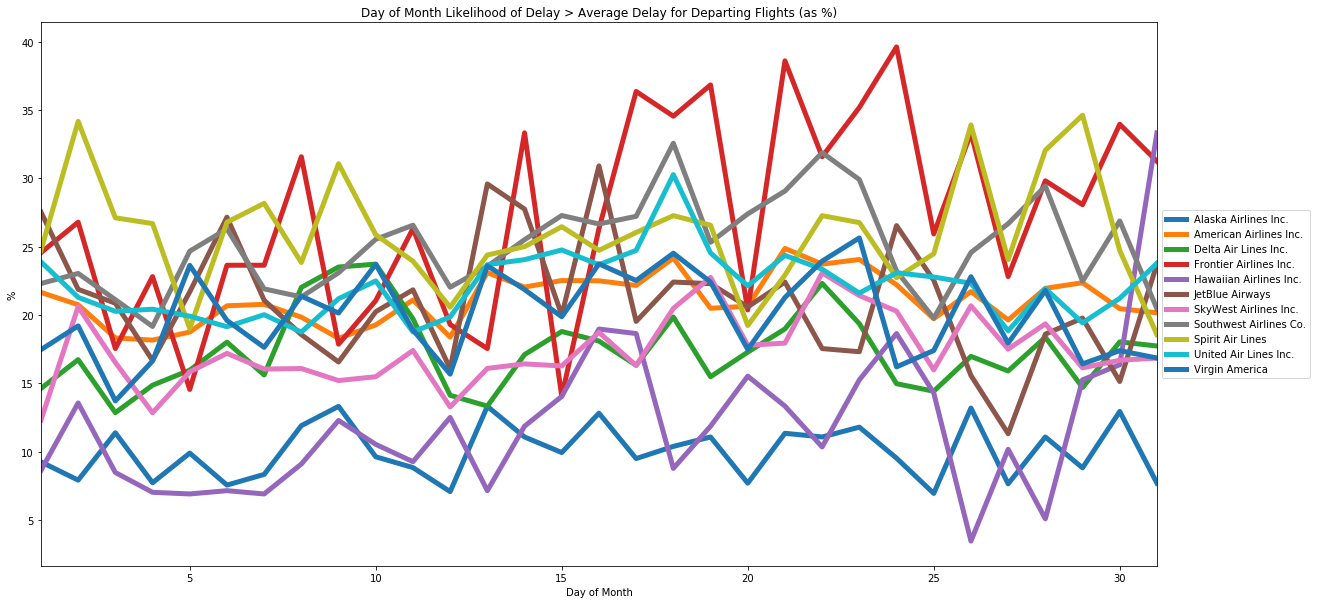

In [163]:
#For DESTINATION flights, on each day of the month, what is the liklihood you'll experience a greater than average delay (i.e. greater than 12.52 minutes), by carrier

higherthannormaldomdest.plot(kind="line", linewidth=5, figsize=(20,10), title="Day of Month Likelihood of Delay > Average Delay for Departing Flights (as %)")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Day of Month")
ax.set_ylabel("%")
plt.savefig("DOM_Dest_GreaterDelayvsAvg.png")
plt.show()